This notebook contains various examples of how to read tabulated data in Python.

Date Created: Fall 2016 
Last Modified: Oct 16 2017 
Humans Responsible: The Prickly Pythons

In [1]:
%matplotlib inline

## Read data files in different formats (and save them) in python

### Starting with Ascii files!

In [ ]:
# In test_data/ there is a text file called spectrum2.dat with 
# data that we want to import into python. 
# (spectrum2.dat is a model stellar spectrum from starburst99 for 
# a group of stars with 0.7 x solar metallicity, 
# 1e4 solar masses population, Kroupa IMF and a starburst 1e6 years ago)

### Reading data into numpy array

In [2]:
import numpy as np
# http://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html
spec_nparray    =   np.loadtxt('test_data/spectrum.dat',skiprows=6)
print(type(spec_nparray))

<type 'numpy.ndarray'>


In [3]:
# Shape of this numpy array will be determined by number of columns and rows in your data:
print(spec_nparray.shape)

(1221, 5)


In [4]:
# And if you want to extract e.g. wavelength, you need to remember the column index, in this case 0:
wavelength_A = spec_nparray[:,1]
print(wavelength_A)

[  9.10000000e+01   9.40000000e+01   9.60000000e+01 ...,   1.20000000e+06
   1.40000000e+06   1.60000000e+06]


In [5]:
# By default, numbers are loaded with float 64bit precision: 
wavelength_A.dtype

dtype('float64')

In [ ]:
# The genfromtxt function from numpy is a bit more flexible
# http://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html

In [7]:
spec_nparray2    =   np.genfromtxt('test_data/spectrum.dat',skip_header=6,\
                    names=['t_yr','wavelength_A','L_tot','L_stellar','L_nebular'])
print(type(spec_nparray2))
print(spec_nparray[0,1])
print(spec_nparray2['wavelength_A'][0])

<type 'numpy.ndarray'>
91.0
91.0


In [17]:
# Try to change one of the wavelengths into something that is not a number (like %%%) and you will see that genfromtxt 
# can handle this with the keywords missing_values='%%%',filling_values=-1:
spec_nparray2    =   np.genfromtxt('test_data/spectrum_nan.dat',skip_header=6,\
                    names=['t_yr','wavelength_A','L_tot','L_stellar','L_nebular'],\
                    missing_values='%%%',filling_values=np.nan)
print(spec_nparray2['wavelength_A'][0])

nan


In [14]:
# But loadtxt will crash:
spec_nparray    =   np.loadtxt('test_data/spectrum_nan.dat',skiprows=6)
print(type(spec_nparray2))

ValueError: could not convert string to float: %%%

### Read data into pandas dataframe

In [ ]:
# Typically, a smarter way (if you are essentially loadin a matrix) 
# is to load the data directly into a pandas dataframe
# http://pandas.pydata.org/pandas-docs/stable/dsintro.html

In [26]:
import pandas as pd
names=['t_yr','wavelength_A','L_tot','L_stellar','L_nebular']
spec_dataframe    =   pd.read_table('test_data/spectrum.dat',\
                names=names,\
                skiprows=6,sep=r"\s*",engine='python')    
print(type(spec_dataframe))

<class 'pandas.core.frame.DataFrame'>


In [19]:
spec_dataframe['t_yr'][1]

10010000.0

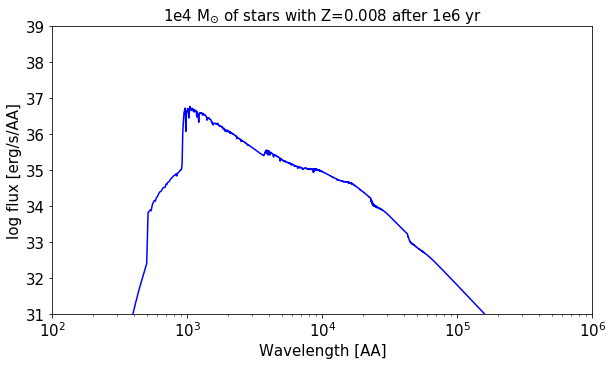

In [20]:
# Plot spectrum
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 15
mpl.rcParams['ytick.labelsize'] = 15
fig          =   plt.figure(0,figsize=(10,5))
ax1          =   fig.add_axes([0.15,0.1,0.75,0.8])
ax1.set_ylim(31,39)
ax1.set_xlim(1e2,1e6)
ax1.set_xscale('log')
ax1.set_xlabel('Wavelength [AA]',fontsize=15)
ax1.set_ylabel('log flux [erg/s/AA]',fontsize=15)
ax1.set_title('1e4 M$_{\odot}$ of stars with Z=0.008 after 1e6 yr',fontsize=15)#+str(t1)+' yr')
#ax1.plot(spec_nparray[:,1],spec_nparray[:,2],'b')
#ax1.plot(spec_nparray2['wavelength'],spec_nparray2['L_tot'],'b')
ax1.plot(spec_dataframe['wavelength_A'],spec_dataframe['L_tot'],'b')
plt.show()

In [21]:
# Using pandas to save a dataframe with pickle:
spec_dataframe.to_pickle('test_data/spec_dataframe_pickle') # no extension
load_spec_dataframe_pickle = pd.read_pickle('test_data/spec_dataframe_pickle')
load_spec_dataframe_pickle['t_yr'][0] # test

10010000.0

## Fits files

In [ ]:
# In test_data/ there is a file called cloud.fits with data that we 
# want to import into python. 
# (cloud.fits is a simulated HCO+ data cube of a cloud, calculated 
# with RT code LIME)

In [ ]:
# Read fits file into list-like Python opject with the fits function from the astropy module
from astropy.io import fits
fits_file = fits.open('test_data/cloud.fits')
print(type(fits_file))
fits_file.info() # get basic info, like number of header cards and dimensions of data

In [ ]:
print(fits_file[0].header) # display all header cards

In [ ]:
# We can extract general info from the header cards like this:
imgres = fits_file[0].header['CDELT2']
print('Image resolution: ' + str(imgres) + ' degrees')
npix = fits_file[0].header['NAXIS3']
print('Number of pixels on each side: ' + str(npix))
velres = fits_file[0].header['CDELT3']
print('Velocity resolution: ' + str(velres) + 'm/s')
fits_file[0].header['CDELT2']=2.0
print('Image resolution: ' + str(imgres) + ' degrees')

In [ ]:
# And the actual data is an attribute of data[0]
HCO_flux = fits_file[0].data # [velocity channels, x axis, y axis]
print(HCO_flux[0,50,50])
mom0 = HCO_flux.sum(axis=0)*velres/1000 # moment 0 map, Jy*km/s

In [ ]:
# Contour plot of data cube
import matplotlib.cm as cm
fig         =   plt.figure(1,figsize=(9,9))
ax1         =   fig.add_axes([0.15,0.1,0.75,0.8])
ax1.set_xlabel("x ['']",fontsize=15)
ax1.set_ylabel("y ['']",fontsize=15)
ax1.set_title("Moment 0 map of HCO$^+$ gas cloud",fontsize=15)
x1 = imgres*(np.arange(npix)-npix/2) # image axis
xmax = max(x1)
im = ax1.imshow(mom0,interpolation='bilinear',origin='lower',cmap=cm.hot,extent=(-xmax,xmax,-xmax,xmax),vmax=120)
cax = fig.add_axes([0.9,0.1,0.05,0.8])
cbar = plt.colorbar(im,cax=cax)
cbar.set_label('Jy km/s',size=20)
plt.show(block=False)

## Saving python data for later with numpy

In [22]:
# Say you have a numpy array that you want to save to a file and load later. 
# One way to do so is with numpy:
np.save('test_data/spec_nparray',spec_nparray) # will get a 'npy' extension
load_spec_nparray = np.load('test_data/spec_nparray.npy')
load_spec_nparray[0,0] # test

10010000.0

In [23]:
# You can also use pickle! Or cPickle, which is pickle written in C, 
# with several advantages.
import cPickle as pickle
pickle.dump(spec_nparray,open('test_data/spec_nparray_pickle','wb')) # no extension
# 'wb' is the protocol and means to write to binary format
load_spec_nparray = pickle.load(open('test_data/spec_nparray_pickle','rb'))
load_spec_nparray[0,0] # test

10010000.0

In [24]:
# But the to_pickle attribute is specific to pandas and will not work on say a numpy array:
spec_nparray.to_pickle('test_data/spec_dataframe_pickle')

AttributeError: 'numpy.ndarray' object has no attribute 'to_pickle'